In [43]:
from PIL import Image
import os
import skimage as sk
import napari
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from napari_animation import Animation
import imagecodecs
from tifffile import imread

os.chdir('C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi\\SHG\\SHG_20250207')
sns.set_theme(font_scale=2, style = 'whitegrid', context= 'notebook')

In [44]:
files

['0.5RF_Control2_MaxProj.tif',
 '0.5RF_Control_MaxProj.tif',
 '0.5RF_Treated2_MaxProj.tif',
 '0.5RF_Treated_MaxProj.tif']

(975, 968)

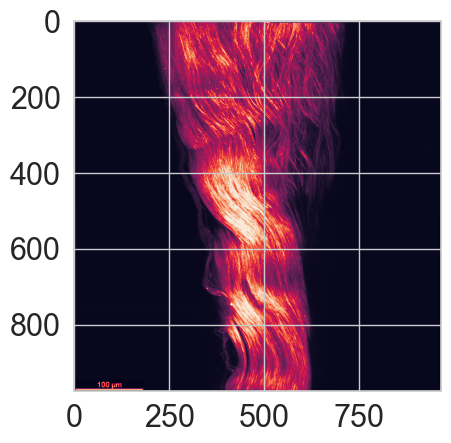

In [11]:
plt.imshow(plt.imread(files[0])[:, :, 1])#files[0]
plt.imread(files[0])[:, :, 0].shape

In [45]:
files = [f for f in os.listdir() if 'Max' in f]
#print(files)
imgs = [imread(f)[:, 250:, 1] for f in files] #400:600
im_gauss = [sk.filters.gaussian(im) for im in imgs]
im_sobel = [sk.filters.sobel(im) for im in imgs]
thr = [sk.filters.threshold_local(im) for im in im_sobel]#, block_size=25, offset=5
bin_otsu = [np.where(im > th, im, 0) for im, th in zip(imgs, thr)]
im_canny = [sk.feature.canny(im, sigma = .5) for im in bin_otsu]#im_sobel
im_skeleton = [sk.morphology.skeletonize(im) for im in im_canny]

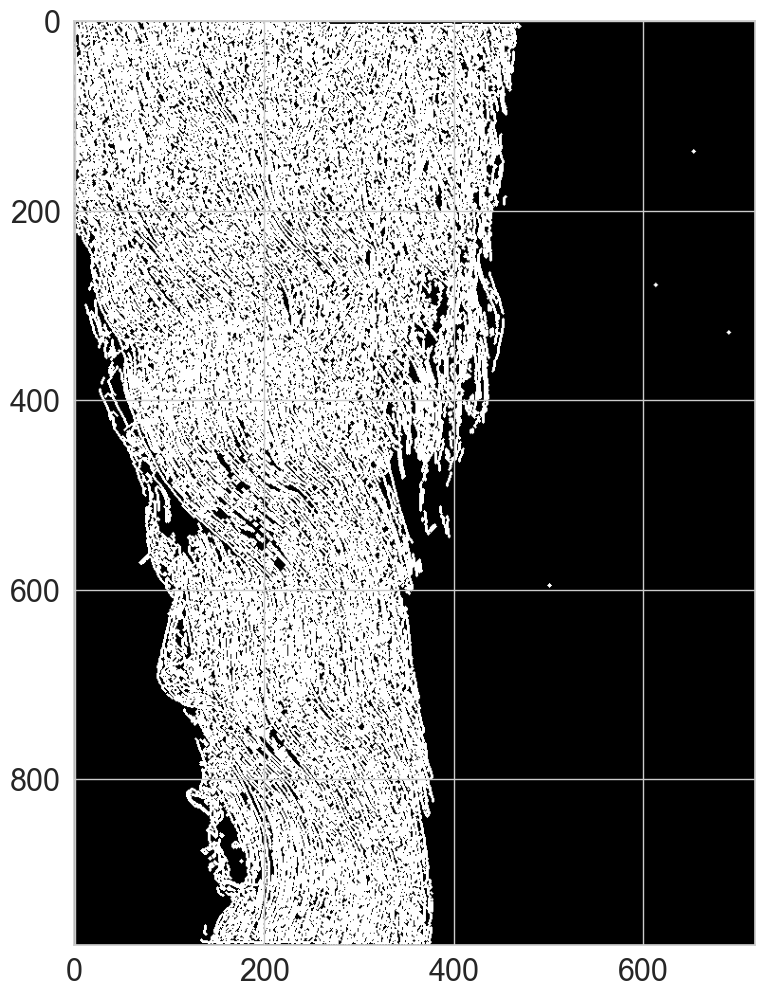

In [32]:
plt.figure(figsize = (12, 12))
plt.imshow([sk.morphology.dilation(im) for im in im_skeleton][0], cmap = 'gray')

In [50]:
import cv2
import numpy as np
from skimage import measure


def measure_waviness(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold the image to binary
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    
    # Label the connected components
    labeled_image, num_labels = measure.label(binary, connectivity=2, return_num=True)
    
    waviness_values = []
    
    for label in range(1, num_labels + 1):
        # Extract the coordinates of the current fiber
        coords = np.column_stack(np.where(labeled_image == label))
        
        # Fit a polynomial to the fiber
        if len(coords) > 1:
            poly = np.polyfit(coords[:, 1], coords[:, 0], 2)
            poly_deriv = np.polyder(poly)
            curvature = np.polyval(poly_deriv, coords[:, 1])
            waviness = np.std(curvature)
        else:
            waviness = 0
        
        waviness_values.append(waviness)
    
    return waviness_values

'''# Example usage
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure, morphology
from skimage.measure import regionprops, label
from skimage.morphology import skeletonize
from scipy.spatial.distance import euclidean

# Load binary image (ensure it's thresholded properly)
binary_image = io.imread('Control_2mins_MaxProj.tif') > 0  # Ensure it's binary

# Skeletonize the fibers to obtain centerlines
skeleton = skeletonize(binary_image)

# Label each connected fiber
label_image = label(skeleton)

# Check if any fibers were found
if np.max(label_image) == 0:
    raise ValueError("No fibers detected. Check your input binary image.")

# Initialize results storage
waviness_values = []

# Create figure for visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(binary_image, cmap="gray")  # Display the original binary image

# Loop through each labeled fiber
for region in regionprops(label_image):
    # Get the actual length (skeleton length)
    actual_length = region.perimeter  # Approximation for curvy skeletons

    # Get coordinates of the fiber's bounding box
    coords = region.coords

    # Find fiber endpoints (heuristic approach)
    min_row, min_col = np.min(coords, axis=0)
    max_row, max_col = np.max(coords, axis=0)
    endpoint1 = (min_row, min_col)
    endpoint2 = (max_row, max_col)

    # Compute the end-to-end Euclidean distance
    end_to_end_distance = euclidean(endpoint1, endpoint2)

    # Compute waviness
    waviness = actual_length / end_to_end_distance if end_to_end_distance > 0 else np.nan
    waviness_values.append(waviness)

    # Plot the fiber with endpoints
    ax.plot([endpoint1[1], endpoint2[1]], [endpoint1[0], endpoint2[0]], '-r', linewidth=2)

# Show results
plt.title("Fiber Waviness Visualization")
plt.show()

# Print waviness values
print("Waviness values for each fiber:", waviness_values)

image_path = '0.5RF_Control2_MaxProj.tif'
waviness_values = measure_waviness(image_path)
print("Waviness values for each labeled fiber:", waviness_values)'''

'# Example usage\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom skimage import io, measure, morphology\nfrom skimage.measure import regionprops, label\nfrom skimage.morphology import skeletonize\nfrom scipy.spatial.distance import euclidean\n\n# Load binary image (ensure it\'s thresholded properly)\nbinary_image = io.imread(\'Control_2mins_MaxProj.tif\') > 0  # Ensure it\'s binary\n\n# Skeletonize the fibers to obtain centerlines\nskeleton = skeletonize(binary_image)\n\n# Label each connected fiber\nlabel_image = label(skeleton)\n\n# Check if any fibers were found\nif np.max(label_image) == 0:\n    raise ValueError("No fibers detected. Check your input binary image.")\n\n# Initialize results storage\nwaviness_values = []\n\n# Create figure for visualization\nfig, ax = plt.subplots(figsize=(8, 8))\nax.imshow(binary_image, cmap="gray")  # Display the original binary image\n\n# Loop through each labeled fiber\nfor region in regionprops(label_image):\n    # Get the actual lengt

In [51]:
files

['Control_12mins_MaxProj.tif',
 'Control_17mins_MaxProj.tif',
 'Control_22mins_MaxProj.tif',
 'Control_2mins_MaxProj.tif',
 'Control_7mins_MaxProj.tif',
 'Treated_12mins_MaxProj.tif',
 'Treated_17mins_MaxProj.tif',
 'Treated_22mins_MaxProj.tif',
 'Treated_2mins_MaxProj.tif',
 'Treated_7mins_MaxProj.tif']

In [52]:
waviness_dict = {}
for img in files:
    waviness_values = measure_waviness(img)
    waviness_dict[img] = waviness_values
    

    

C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13024\2868887354.py:24: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(coords[:, 1], coords[:, 0], 2)
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13024\2868887354.py:24: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(coords[:, 1], coords[:, 0], 2)
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13024\2868887354.py:24: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(coords[:, 1], coords[:, 0], 2)
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13024\2868887354.py:24: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(coords[:, 1], coords[:, 0], 2)
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13024\2868887354.py:24: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(coords[:, 1], coords[:, 0], 2)
C:\Users\oadeji01\AppData\Local\Temp\ipykernel_13024\2868887354.py:24: RankWarning: Polyfit may be poorly conditioned
  poly = np.polyfit(coords[:, 1], coo

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
pd.DataFrame.from_dict(waviness_dict, orient='index').reset_index().groupby('index').sum()

TypeError: GroupBy.sum() got an unexpected keyword argument 'axis'

In [53]:
properties = []
for id, im in enumerate(im_skeleton):
    #print(files[id])
    labeled_im, num_labels =  sk.measure.label(im, return_num=True)
    props = sk.measure.regionprops(labeled_im, intensity_image=labeled_im)
    #print(*props)
    num_fibers = labeled_im.mean()
    im_props = [{
                'image_name': files[id].split('_M')[0], 
                'fiber_count': num_fibers,
                'intensity': prop.mean_intensity,
                #'slice':id, 
                'label': prop.label, 
                'area': prop.area, 
                #'centroid': prop.centroid, 
                'orientation': np.degrees(prop.orientation), 
                'length': prop.perimeter,
                #'density': prop.area/prop.convex_area if prop.convex_area > 0 else 0
    } for prop in props]
    properties.extend(im_props)

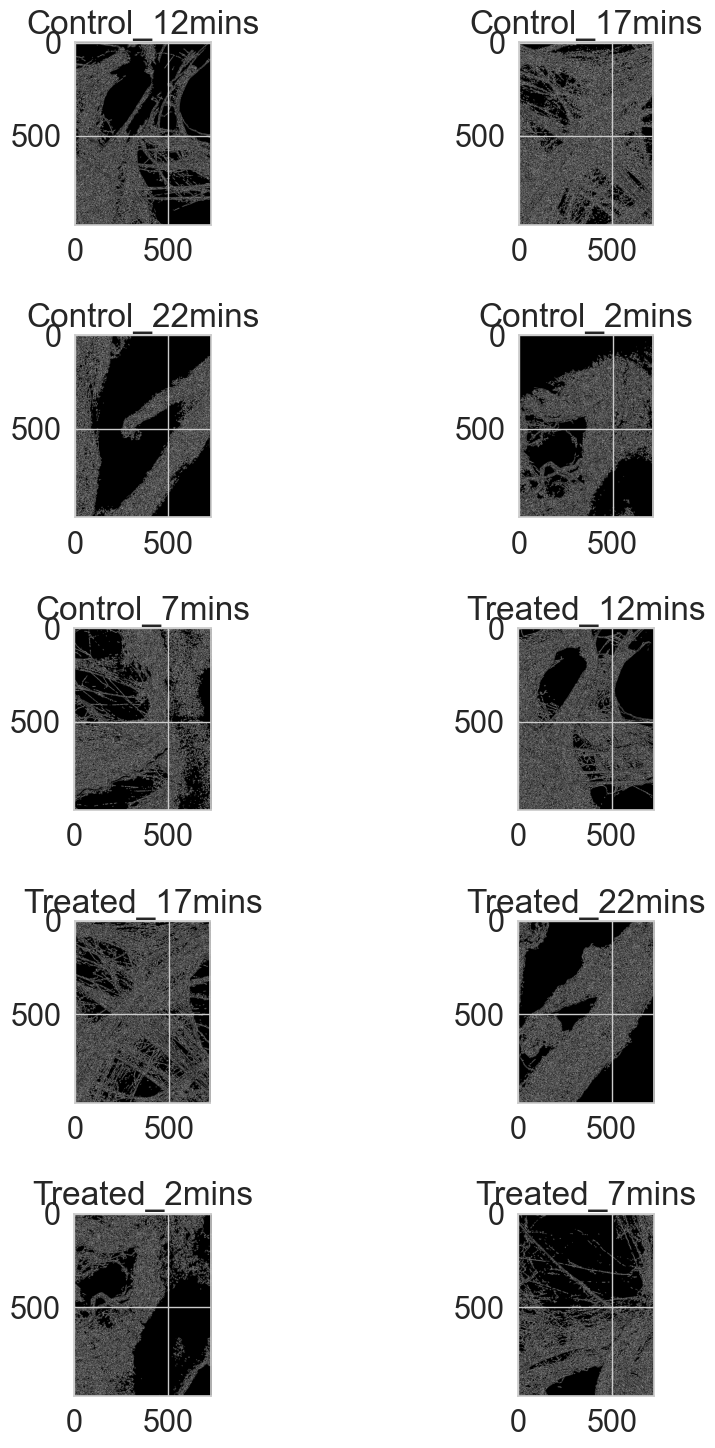

In [55]:
fig, axes = plt.subplots(5,2, figsize = (15, 15))
plt.subplots_adjust(wspace=0.01, hspace=0.05)
for id, ax in enumerate(axes.flat):
    #print(id)
    ax.imshow(im_skeleton[id], cmap = 'gray')
    ax.set_title(files[id].split('_M')[0])
    #ax.axis('off')
    plt.tight_layout()


#I expected 1 set of values for each image, but it seems each image has multiple values. Not sure hwat I am doing wrong.

In [56]:
df = pd.DataFrame(properties)
df.head()

,image_name,fiber_count,intensity,label,area,orientation,length
0,Control_12mins,241.38271,1.0,1,7.0,52.161360,7.449747
1,Control_12mins,241.38271,2.0,2,4.0,90.000000,2.000000
2,Control_12mins,241.38271,3.0,3,74.0,76.046977,77.976659
3,Control_12mins,241.38271,4.0,4,227.0,-73.101975,239.273124
4,Control_12mins,241.38271,5.0,5,729.0,32.992525,758.494516


In [57]:
dff = pd.concat([df['image_name'].str.split('_', expand=True).rename({0: 'Conc', 1: 'Treated'}, axis=1), df.iloc[:, 1:]], axis=1)
dff.head()

,Conc,Treated,fiber_count,intensity,label,area,orientation,length
0,Control,12mins,241.38271,1.0,1,7.0,52.161360,7.449747
1,Control,12mins,241.38271,2.0,2,4.0,90.000000,2.000000
2,Control,12mins,241.38271,3.0,3,74.0,76.046977,77.976659
3,Control,12mins,241.38271,4.0,4,227.0,-73.101975,239.273124
4,Control,12mins,241.38271,5.0,5,729.0,32.992525,758.494516


In [37]:
dff.groupby('Conc').mean(numeric_only=True)

,fiber_count,intensity,label,area,orientation,length
Conc,,,,,,
0.5RF,158.806301,1646.868921,1646.868921,30.417155,-1.830332,29.652794


In [60]:
dff.Treated.unique()

array(['12mins', '17mins', '22mins', '2mins', '7mins'], dtype=object)

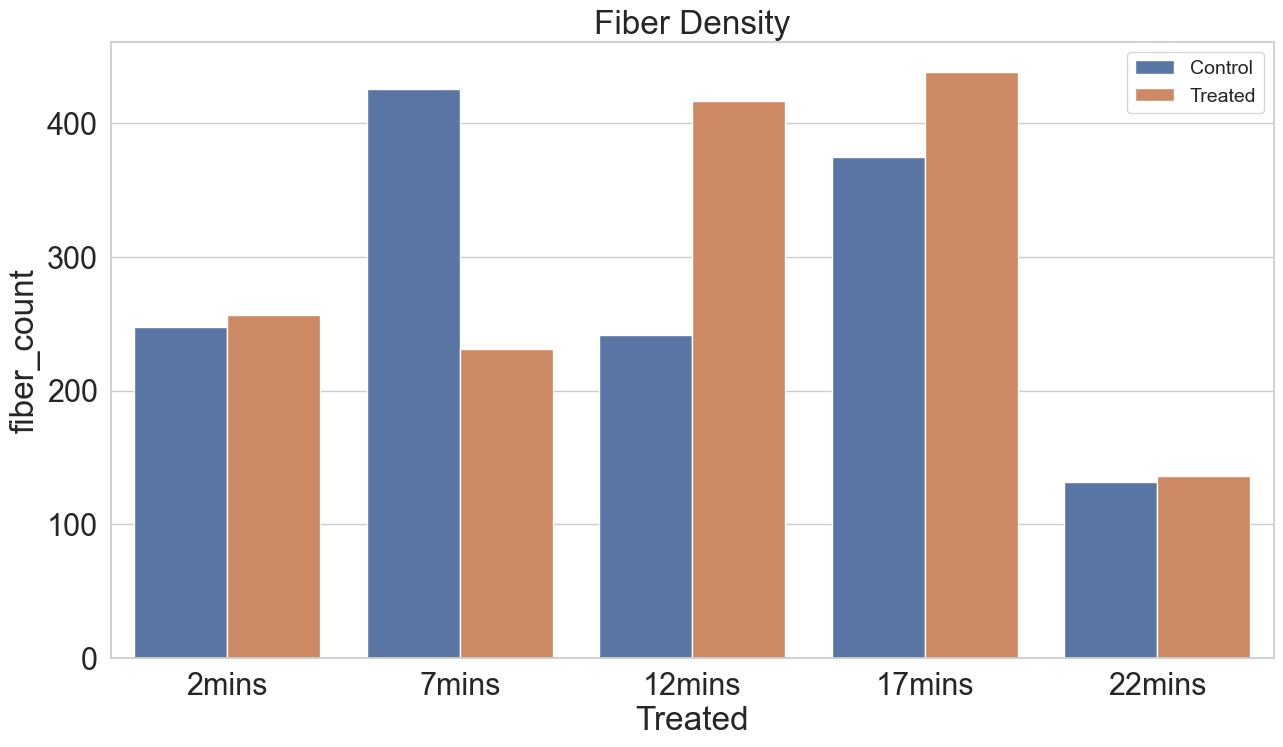

In [65]:
plt.figure(figsize = (15, 8));
sns.barplot(data = dff, #.groupby('image_name').mean(), #[(df.trt_level == '0.1RF')],#(df.trt_level <= '0.5RF') & 
            x = 'Treated',
            y = 'fiber_count',
            hue = 'Conc',
            #estimator='median',
            #errorbar='sd',
            #log_scale = True,
            #width=.4,
            #gap = .2,
            order = ['2mins', '7mins', '12mins', '17mins', '22mins'],
            #style='treated',
            #err_style='bars'
            );
#plt.xticks(rotation = 30);
plt.title('Fiber Density')
plt.legend(fontsize = 14)